In [1]:
import pandas as pd

In [2]:
socar_df = pd.read_csv('insurance_fraud_detect_data.csv')
socar_df

,fraud_YN,car_model,sharing_type,age_group,has_previous_accident,cumulative_use_count,b2b,accident_ratio,pf_type,socarpass,...,insure_cost,accident_location,car_part1,car_part2,repair_cnt,acc_type1,insurance_site_aid_YN,police_site_aid_YN,total_prsn_cnt,test_set
0,0,2,1,3,0,2,0,100,2,0,...,0,1,0,0,1,0,0,0,-1,0
1,0,1,0,4,0,4,0,0,3,1,...,0,1,1,1,2,1,1,1,0,1
2,0,1,0,4,1,4,0,100,3,1,...,12925040,3,1,0,2,1,1,1,0,1
3,0,3,1,3,0,4,0,0,2,0,...,0,3,1,0,1,0,0,0,-1,0
4,0,1,0,1,0,1,0,100,1,0,...,1209410,1,0,0,2,0,0,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0,2,0,2,0,2,0,100,2,0,...,0,1,1,0,1,0,0,0,-1,0
15996,0,2,0,2,1,4,0,100,1,1,...,0,2,1,0,1,0,0,0,-1,0
15997,0,2,1,2,0,4,0,100,1,0,...,0,0,0,0,1,0,0,0,-1,1
15998,0,2,0,2,0,2,0,100,2,0,...,0,4,1,0,1,0,0,0,-1,0


# 데이터셋 기본 정보

In [3]:
socar_df.columns

Index(['fraud_YN', 'car_model', 'sharing_type', 'age_group',
       'has_previous_accident', 'cumulative_use_count', 'b2b',
       'accident_ratio', 'pf_type', 'socarpass', 'socarsave', 'start_hour',
       'duration', 'accident_hour', 'repair_cost', 'insure_cost',
       'accident_location', 'car_part1', 'car_part2', 'repair_cnt',
       'acc_type1', 'insurance_site_aid_YN', 'police_site_aid_YN',
       'total_prsn_cnt', 'test_set'],
      dtype='object')

In [4]:
socar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fraud_YN               16000 non-null  int64  
 1   car_model              16000 non-null  int64  
 2   sharing_type           16000 non-null  int64  
 3   age_group              16000 non-null  int64  
 4   has_previous_accident  16000 non-null  int64  
 5   cumulative_use_count   16000 non-null  int64  
 6   b2b                    16000 non-null  int64  
 7   accident_ratio         16000 non-null  int64  
 8   pf_type                16000 non-null  int64  
 9   socarpass              16000 non-null  int64  
 10  socarsave              16000 non-null  int64  
 11  start_hour             16000 non-null  int64  
 12  duration               16000 non-null  int64  
 13  accident_hour          16000 non-null  int64  
 14  repair_cost            16000 non-null  float64
 15  in

### 16000개 데이터 중 사기 데이터는 총 41건
### 데이터 불균형 극심 ==> 0.26%

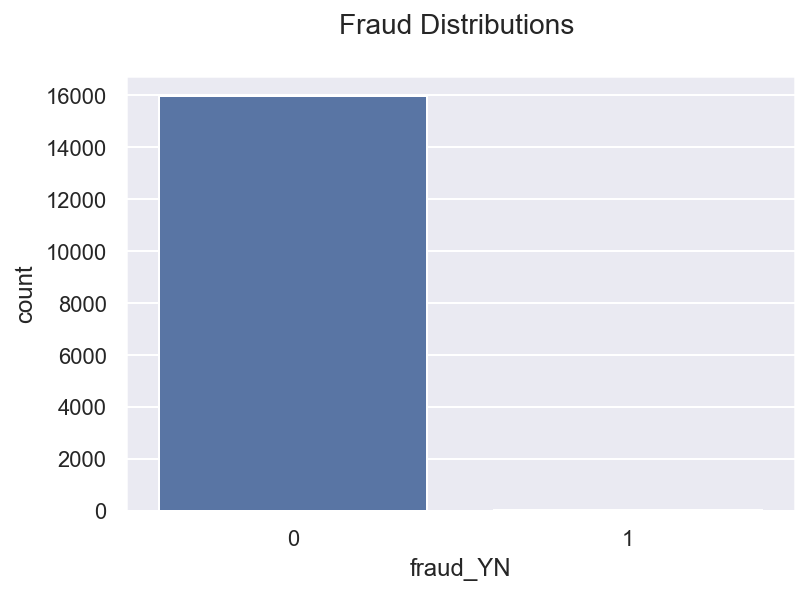

In [5]:
import warnings
warnings.filterwarnings('ignore')

sns.countplot('fraud_YN', data=socar_df)
plt.title("Fraud Distributions \n", fontsize=14)
plt.show()

In [6]:
socar_df['fraud_YN'].value_counts()

0    15959
1       41
Name: fraud_YN, dtype: int64

In [7]:
frauds_rate = round(socar_df['fraud_YN'].value_counts()[1]/len(socar_df) * 100, 2)
print('Frauds', frauds_rate, '% of the dataset')

Frauds 0.26 % of the dataset


## <1. accident_hour>

In [9]:
fraud = socar_df[socar_df["fraud_YN"] == 1]
normal = socar_df[socar_df["fraud_YN"] == 0]

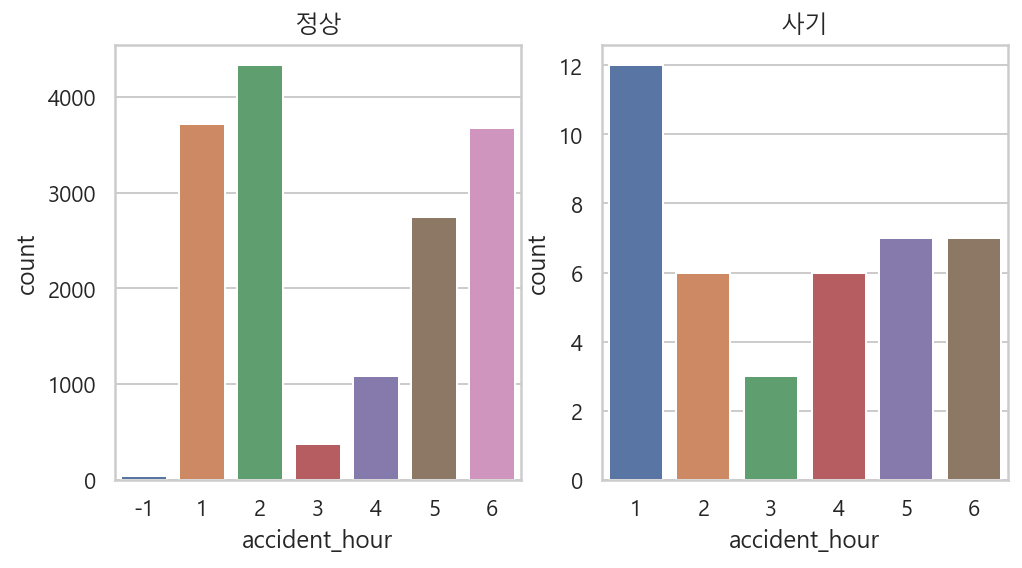

In [10]:
from matplotlib import rc
rc('font', family='Malgun Gothic')
import matplotlib.pyplot as plt
%matplotlib inline

# 사기인 경우 21시에서 4시 사이에 사고가 많이 일어난다.
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
sns.countplot(data=normal, x='accident_hour', ax=ax[0]).set_title('정상');
sns.countplot(data=fraud, x='accident_hour', ax=ax[1]).set_title('사기');

## accident_hour == -1인 36개의 데이터 삭제 ! 

In [12]:
df = socar_df[socar_df['accident_hour'] == -1].index
socar = socar_df.drop(df)


In [13]:
fraud = socar[socar["fraud_YN"] == 1]
normal = socar[socar["fraud_YN"] == 0]

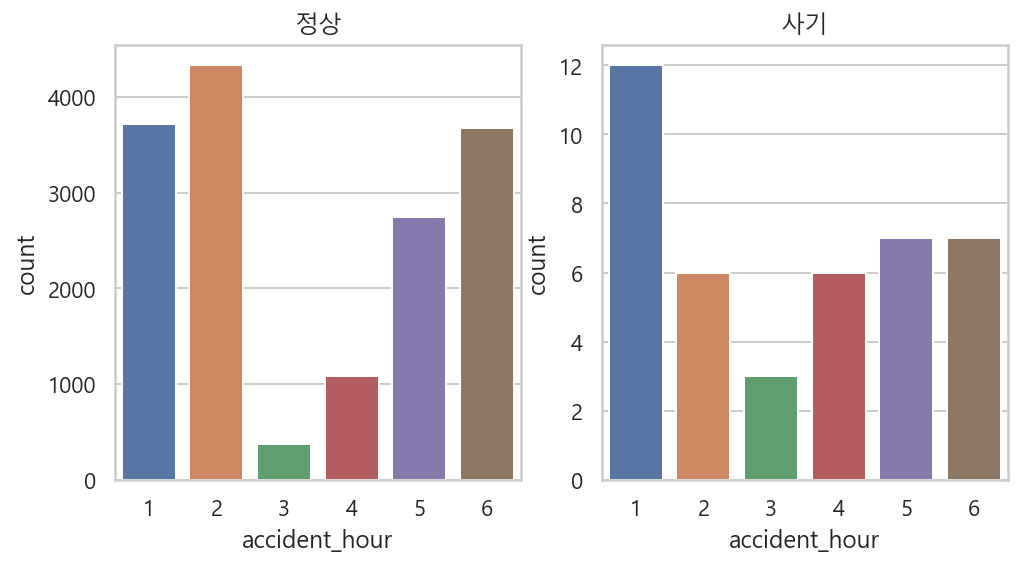

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
sns.countplot(data=normal, x='accident_hour', ax=ax[0]).set_title('정상');
sns.countplot(data=fraud, x='accident_hour', ax=ax[1]).set_title('사기');

- 사기꾼들은 사기친 시간이 유독 1번 시간대((0,1,2,3,4,21,22,23) 등 비주류 시간)가 많은데, 쏘카 특성상 대개 많은 쿠폰이 이 시간대에 사용할 수 있고, 그 외에 시간은 수요가 많은 시간으로 쿠폰 사용이 제한된다.
- 사기꾼들은 최대한 작은 돈으로 쏘카를 이용하려고 할 것이고, 최대한 쿠폰을 이용하여 돈을 절약할 수 있는 시간대를 이용하려고 한 것이라고 볼 수 있지 않을까?
- 정상인 사람들은 퇴근시간(1,2)에 쓰다가 사고나거나  법인 구성원이 쓸 경우 6번 시간대에 쓰다가 사고가 발생했다고 생각할 수 있는데, 사기 집단에선 1에 해당하는 시간대에가 나머지 시간들보다 유독 높게 나온 것은 꽤 흥미로운 자료라고 볼 수 있지 않을까
- 쿠폰 이용시간(보통 16시간 이하 쿠폰일 경우)
    - 공휴일 사용불가 (쿠폰마다 다름)
    - 주중 18:00 ~ 익일 10:00시까지
    - 주중 17:00 ~ 익일 11:00시까지

### - 변수 정리-

- socar_df : 원본데이터
- socar : `accident_hour == -1`인데이터 삭제
- fraud : `accident_hour = -1 삭제` & 사기꾼(fraud_YN ==1)데이터
- normal : `accident_hour = -1 삭제` & 일반인(fraud_YN == 0)데이터

# <2. 누적대여횟수>

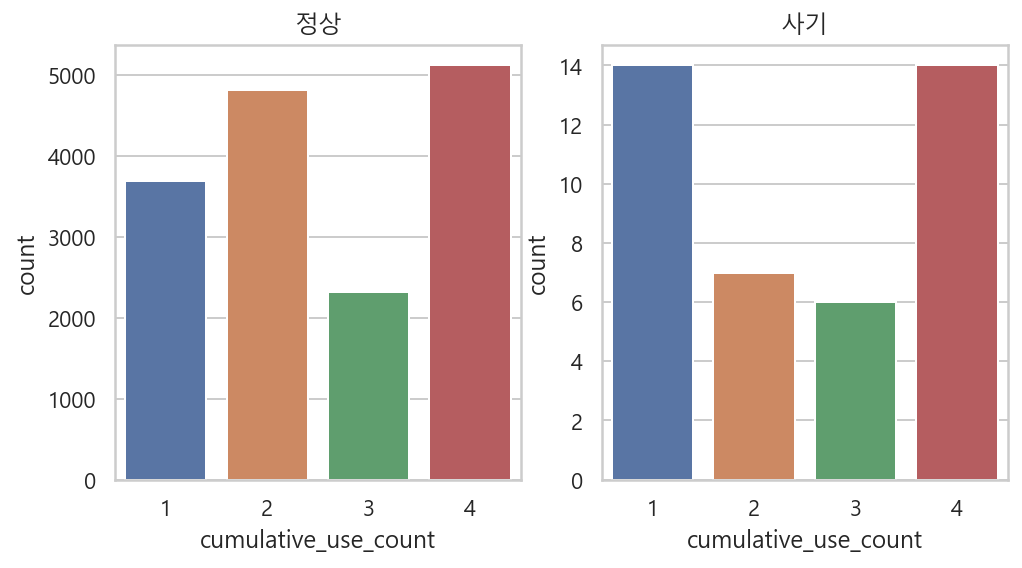

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
sns.countplot(data=normal, x='cumulative_use_count', ax=ax[0]).set_title('정상');
sns.countplot(data=fraud, x='cumulative_use_count', ax=ax[1]).set_title('사기');

## 정상집단에서 누적대여횟수가 1,2인 비율은 각각 
### 23.15%, 30.20%

## 사기집단에서의 누적대여횟수가 1,2인 비율은 각각
### 34.15%, 17.07%

- 정상인들의 대여횟수 1,2 각각 비율

In [19]:
누적대여_정상_1 = round(normal['cumulative_use_count'].value_counts()[1]/len(normal) * 100, 2)
누적대여_정상_1

23.15

In [20]:
누적대여_정상_2 = round(normal['cumulative_use_count'].value_counts()[2]/len(normal) * 100, 2)
누적대여_정상_2

30.2

- 사기꾼들의 대여횟수 1,2 각각 비율

In [21]:
누적대여_사기_1 = round(fraud['cumulative_use_count'].value_counts()[1]/len(fraud) * 100, 2)
누적대여_사기_1

34.15

In [22]:
누적대여_사기_2 = round(fraud['cumulative_use_count'].value_counts()[2]/len(fraud) * 100, 2)
누적대여_사기_2

17.07

# <3. 사고위치>

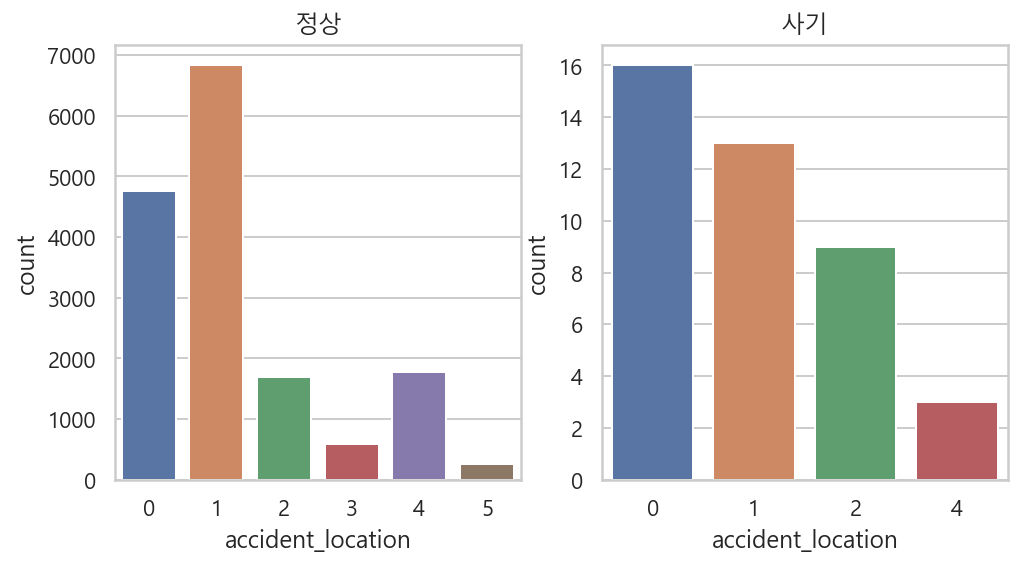

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
sns.countplot(data=normal, x='accident_location', ax=ax[0]).set_title('정상');- 0 : 주차장 (사기집단에서 정상집단에 비해 가장 비율이 높게 나옴)
- 1 : 일반도로
- 2 : 이면도로
- 3 : 고속도로 (사기집단에서 찾아볼 수 없음)
- 4 : 쏘카존
- 5 : 확인불가
sns.countplot(data=fraud, x='accident_location', ax=ax[1]).set_title('사기');

- 0 : 주차장 (사기집단에서 정상집단에 비해 가장 비율이 높게 나옴)
- 1 : 일반도로
- 2 : 이면도로
- 3 : 고속도로 (사기집단에서 찾아볼 수 없음)
- 4 : 쏘카존
- 5 : 확인불가

# <4. 전면손상>

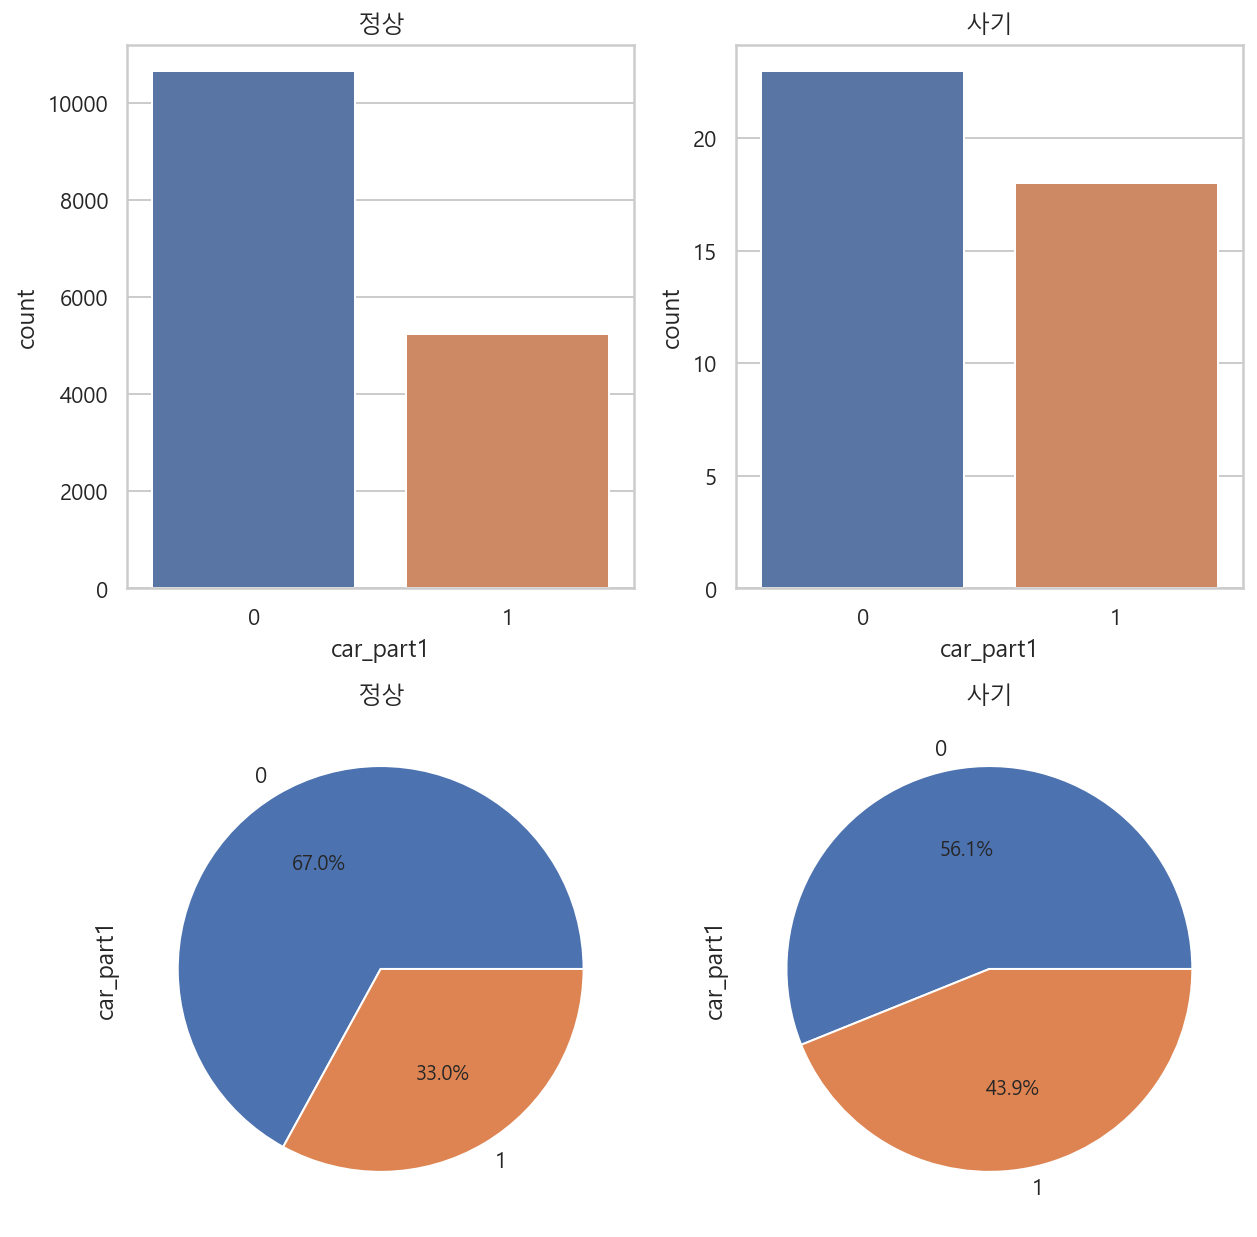

In [24]:
fig, ax = plt.subplots(2, 2, figsize=(10, 11))
plt.subplot(2,2,1)
sns.countplot(data=normal, x='car_part1').set_title('정상');
plt.subplot(2,2,2)
sns.countplot(data=fraud, x='car_part1').set_title('사기');
plt.subplot(2,2,3)
normal['car_part1'].value_counts().plot.pie(autopct='%1.1f%%').set_title('정상');
plt.subplot(2,2,4)
fraud['car_part1'].value_counts().plot.pie(autopct='%1.1f%%').set_title('사기');

- 사기 사건인 경우가 비율적(11%)으로 앞범퍼가 손상이 더 많이 되는 것 같다.
- 후면은 비슷해서 pass

# <5. 수리부위갯수>

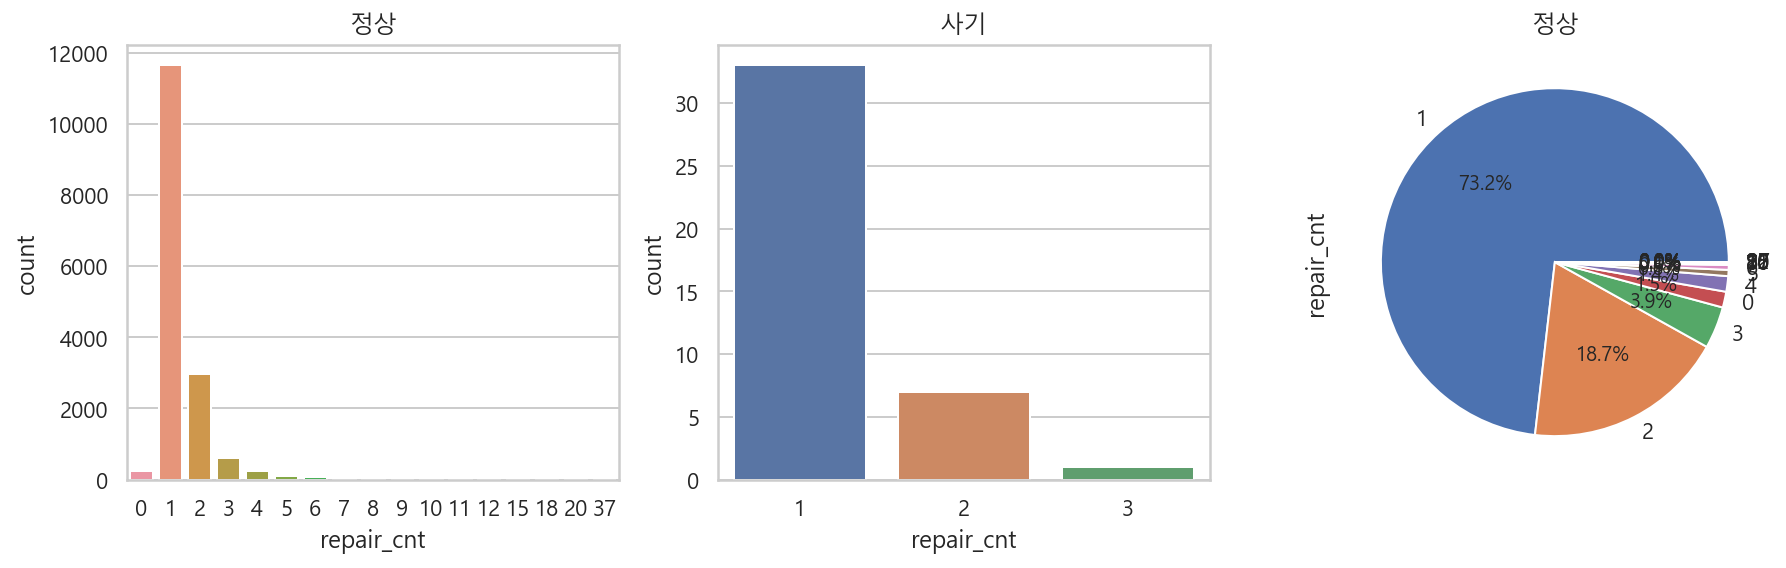

In [27]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
sns.countplot(data=normal, x='repair_cnt', ax=ax[0]).set_title('정상');
sns.countplot(data=fraud, x='repair_cnt', ax=ax[1]).set_title('사기');
socar['repair_cnt'].value_counts().plot.pie(autopct='%1.1f%%').set_title('정상');

## 정상집단에서 수리부위갯수가 1,2인 비율은 각각 
### 23.15%, 30.20%

## 사기집단에서의 수리부위갯수가 1,2인 비율은 각각
### 34.15%, 17.07%

- 정상인들 중 수리갯수 1개,2개 분포 비율

In [28]:
수리부위_정상_1 = round(normal['repair_cnt'].value_counts()[1]/len(- 정상인들 중 수리갯수 1개,2개 분포 비율normal) * 100, 2)
수리부위_정상_1

73.16

In [29]:
수리부위_정상_2 = round(normal['repair_cnt'].value_counts()[2]/len(normal) * 100, 2)
수리부위_정상_2

18.73

- 사기꾼들 중 수리갯수 1개,2개 분포 비율

In [30]:
수리부위_사기_1 = round(fraud['repair_cnt'].value_counts()[1]/len(fraud) * 100, 2)
수리부위_사기_1

80.49

In [31]:
수리부위_사기_2 = round(fraud['repair_cnt'].value_counts()[2]/len(fraud) * 100, 2)
수리부위_사기_2

17.07

- 3개 이상의 비율은 삭제해도 될 것 같다.
- 수리갯수 1개 부분에서 일반인과 사기꾼의 비율이 약 7%정도 차이나는데 이것을 그냥 넘어갈지, 아니면 분류모델에 쓸지 고민 필요
-  사기인 경우 repair_cnt의 개수가 3에서 끝난다. 
- 현수님이 말씀하신대로 아마도 다치지 않을 정도로만 사고를 내려고 하다보니 심한 사고가 나지 않아 수리개수가 적은 것 같다고 볼 수 있나??
- repair_cnt의 분포가 넓은데 전처리를 어떻게 할 지 고민해보면 좋을 듯. 
- 5회 이상의 값은 하나로 묶던지 데이터를 삭제하는 것이 좋을 것 같다.

# <6. 사고타입>

- 0 : 미상

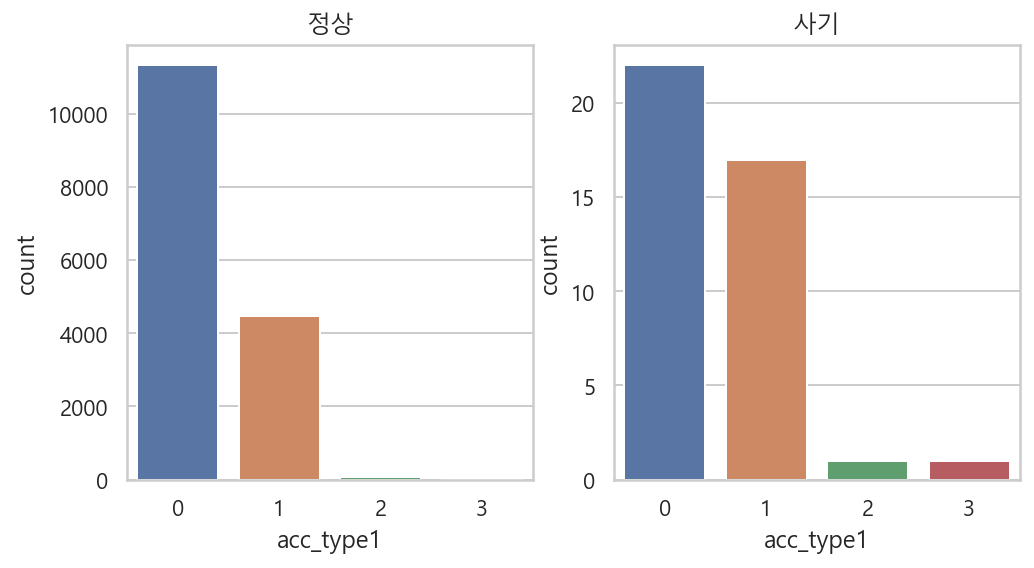

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
sns.countplot(data=normal, x='acc_type1', ax=ax[0]).set_title('정상');
sns.countplot(data=fraud, x='acc_type1', ax=ax[1]).set_title('사기');

### 정상 사고타입 1의 비율(차대차) 28.13%, 사기 사고타입 1의 비율(차대차) 41.46%
#### 사기집단에서 차대차 사고타입이 일반집단에서의 비율보다 더 크다


- 일반

In [33]:
차대차_일반 = round(normal['acc_type1'].value_counts()[1]/len(normal) * 100, 2)
차대차_일반

28.13

- 사기

In [34]:
차대차_사기 = round(fraud['acc_type1'].value_counts()[1]/len(fraud) * 100, 2)
차대차_사기

41.46

# <7. 연령대>

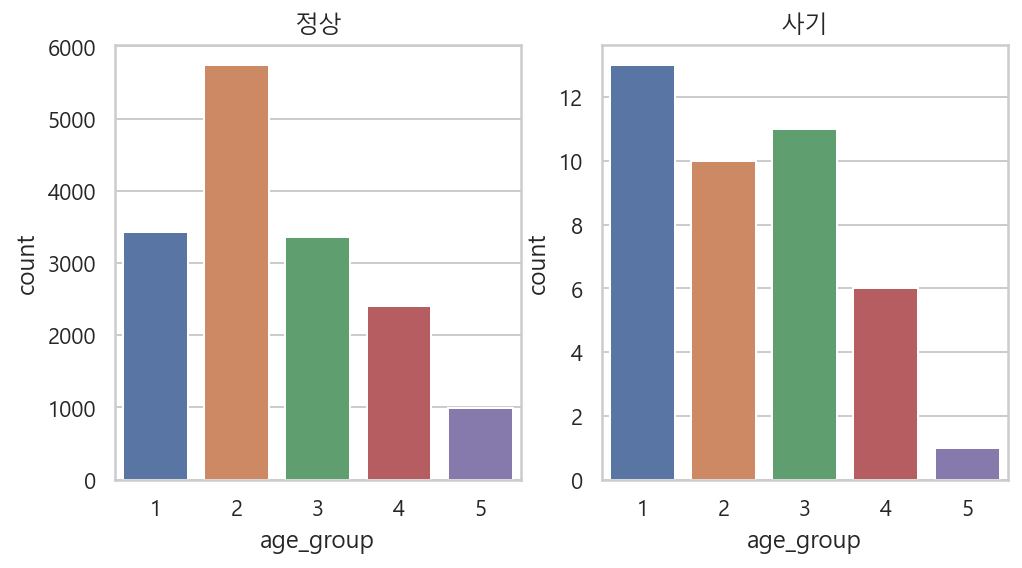

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
sns.countplot(data=normal, x='age_group', ax=ax[0]).set_title('정상');
sns.countplot(data=fraud, x='age_group', ax=ax[1]).set_title('사기');

- 사기건은 21세그룹이 제일 많았고 그 다음으로 27세그룹 23세그룹이었다. 
- 20대 초반이 사기를 많이 공모하는 것을 알 수 있었다.
- 아니면 사기가 어수룩해서 더 많이 사기임이 밝혀졌나? 

# <8. 대여기간>

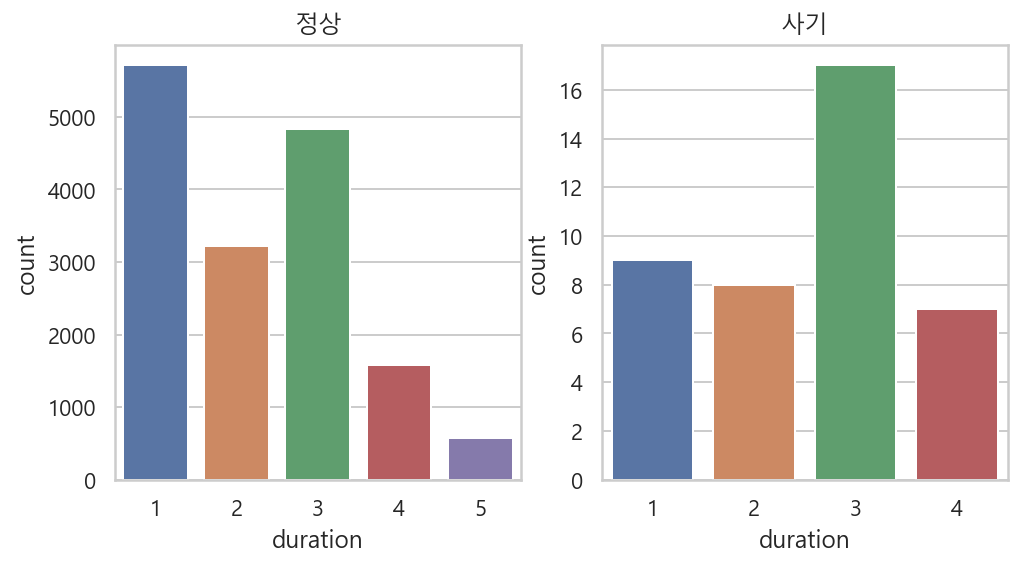

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
sns.countplot(data=normal, x='duration', ax=ax[0]).set_title('정상');
sns.countplot(data=fraud, x='duration', ax=ax[1]).set_title('사기');

- 사기의 경우 10시간~ 1.5일 대여 비율이 높다.
- 16시간짜리 쿠폰? 아님 이 대여기간에 맞는 할인방법이 있나?

# <9. 보험료 타입>

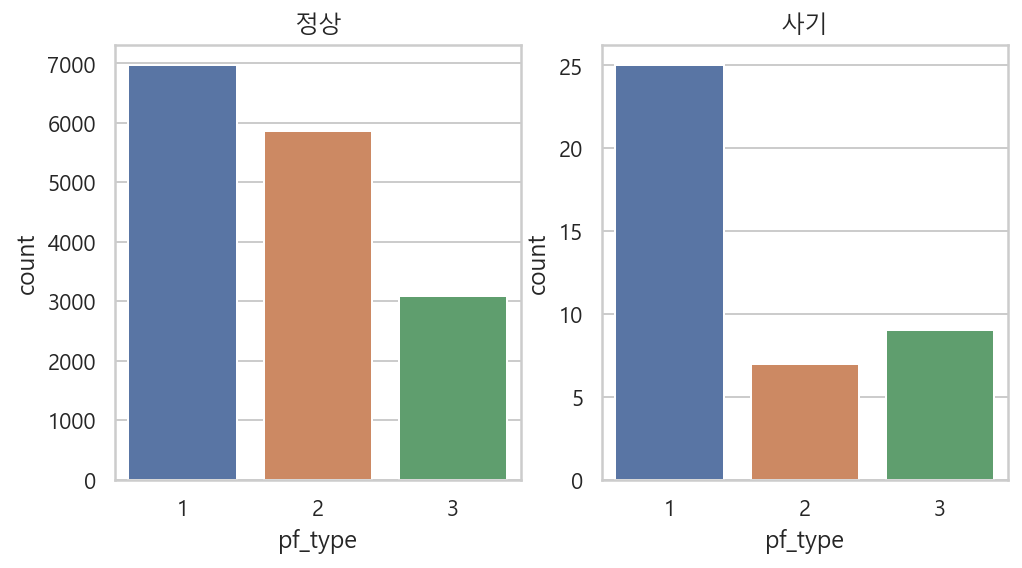

In [37]:

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
sns.countplot(data=normal, x='pf_type', ax=ax[0]).set_title('정상');
sns.countplot(data=fraud, x='pf_type', ax=ax[1]).set_title('사기');

- 보험료(자기부담금) 1. 자기부담금 5만원( 보험료 상) 2. 자기부담금 30만원(보험료 중) 3. 자기부담금 70만원(보험료 하)

- 사기꾼들은 자기부담금 5만원이 2,3에 비해 유독 높다 ==> 대여할 때 보험료는 제일 비싸지만 많이 차이나지 않는다. 유사 시 자기부담금은 5만원밖에 안되니 사기입장에선 1에 해당하는 보험료 가장 많이 나올 수 있겠다

# <10. 보험사 현장출동 유무>


- 1: 출동
- 2: 미출동
- 0: 알수없음

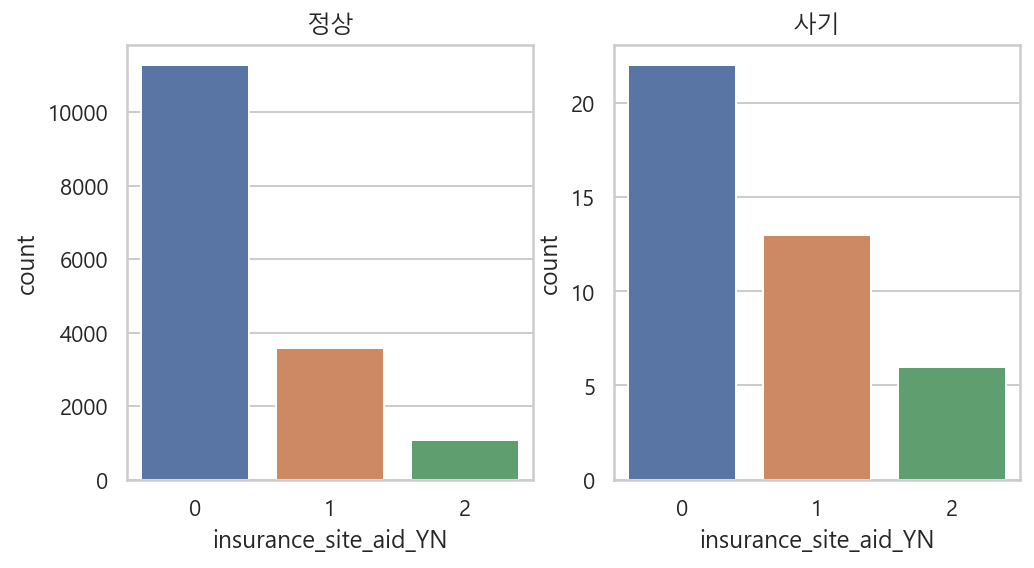

In [38]:

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
sns.countplot(data=normal, x='insurance_site_aid_YN', ax=ax[0]).set_title('정상');
sns.countplot(data=fraud, x='insurance_site_aid_YN', ax=ax[1]).set_title('사기');

- 비율로 보면 보험사가 현장출동 한 건수는 정상인들보다 사기꾼들에게 더 많이 나타난 것 같아보이긴 한다.
- 하지만 알 수 없음의 비율이 높아 어떻게 사용할지는 고민 필요

# <11. 경찰 출동 유무>

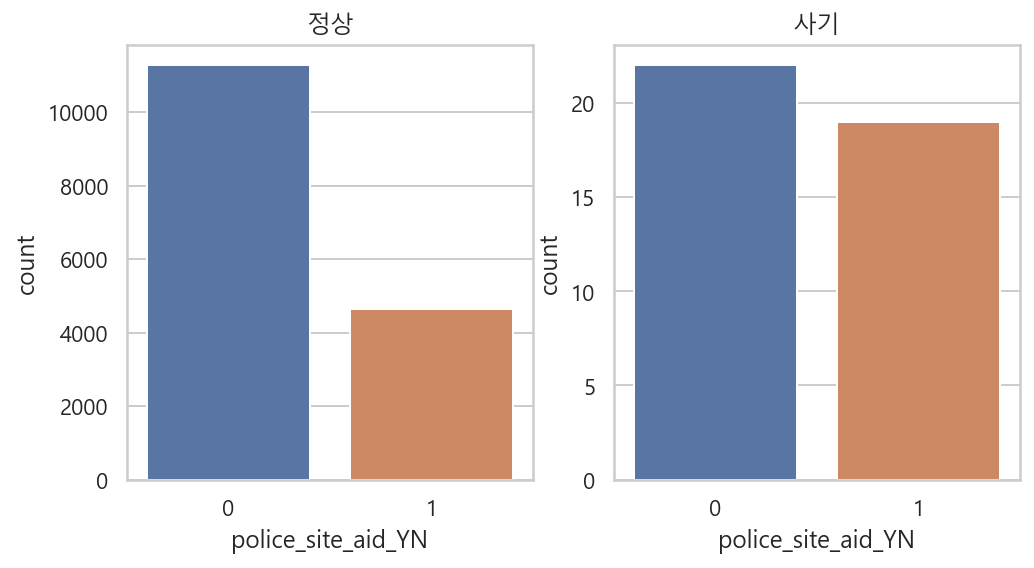

In [40]:

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
sns.countplot(data=normal, x='police_site_aid_YN', ax=ax[0]).set_title('정상');
sns.countplot(data=fraud, x='police_site_aid_YN', ax=ax[1]).set_title('사기');

- 경찰 출동 여부 feature는 미출동(2)이 없고 알수없음과 출동(0,1)만 존재함
- 마찬가지로 알수없음(0)의 비율이 높음 -> 어떻게 사용해야 할지에 대한 고민이 필요해 보임
- 그래도 사기꾼들에겐 경찰의 출동 비율이 높다는 것을 알 수 있다.

# <12. 이용시작시간>

- 1: (0,1,2,3,4,21,22,23) 등 비주류 시간
- 2: (17,18,19,20) 등 퇴근시간
- 4: (8,9,10) 등 출근시간


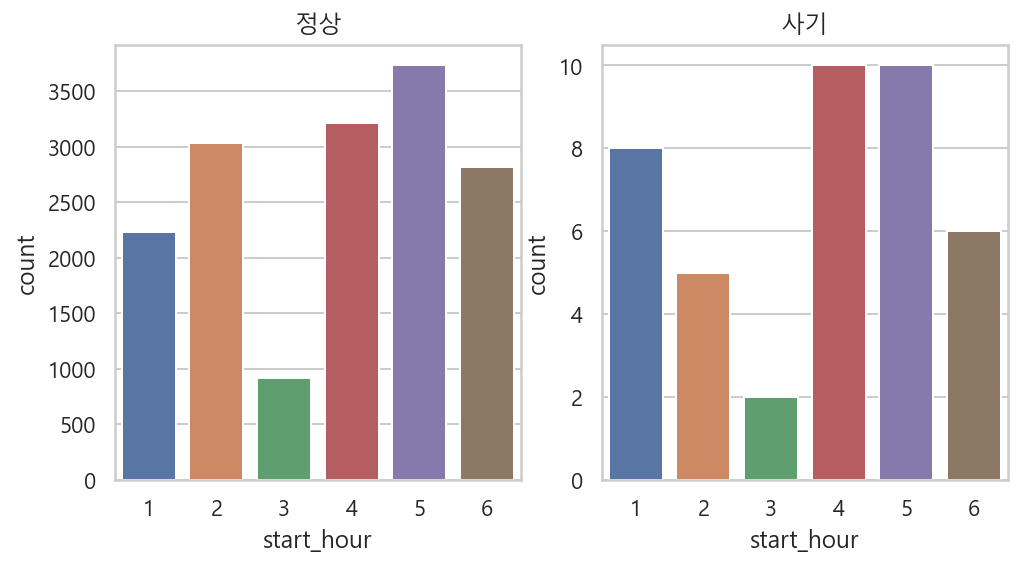

In [41]:

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
sns.countplot(data=normal, x='start_hour', ax=ax[0]).set_title('정상');
sns.countplot(data=fraud, x='start_hour', ax=ax[1]).set_title('사기');

- 1: (0,1,2,3,4,21,22,23) 등 비주류 시간 ==> 쿠폰가능
- 2: (17,18,19,20) 등 퇴근시간 ==> 쿠폰가능
- 4: (8,9,10) 등 출근시간 ==> 쿠폰쓰기 애해한 시간
- 사기 데이터에선 정상인보다 1,4에 해당하는 시간대에 대여를 더 많이했고 이 시간대는 주차장에 사람이 많이 없을 시간대??
- 분류 모델에 넣어볼 수 있을까?

# 13. insure_cost/repair_cost

### <일반인 데이터 중(normal) insure_cost, repair_cost가 둘 다 0인값을 제거 => `normal_insure`>

In [47]:
df = normal[(normal["insure_cost"] == 0) & (normal["repair_cost"] == 0)].index

In [51]:
normal_insure = normal.drop(df)
len(normal_insure)

11879

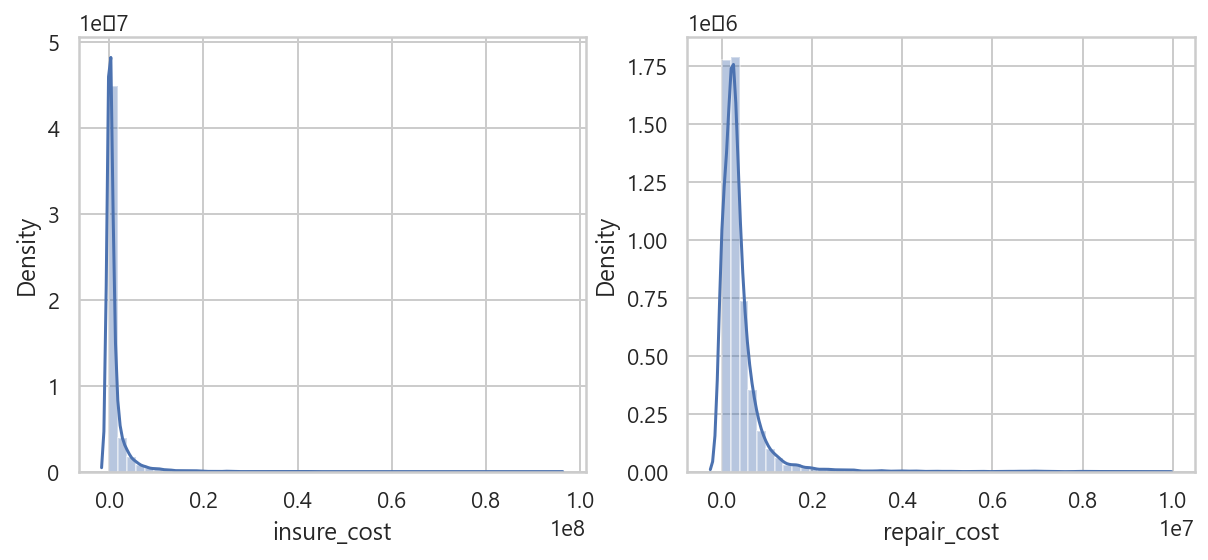

In [52]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.distplot(normal_insure["insure_cost"], ax=ax[0])
sns.distplot(normal_insure["repair_cost"], ax=ax[1])
plt.show()

In [54]:
for idx, data in normal_insure.iterrows():
    if data['insure_cost'] == 0:
        normal_insure.loc[idx, 'insure_cost'] = 0
    else:
        normal_insure.loc[idx, 'insure_cost'] = 1

normal_insure['insure_cost'].value_counts()

0    6323
1    5556
Name: insure_cost, dtype: int64

In [55]:
for idx, data in normal_insure.iterrows():
    if data['repair_cost'] == 0:
        normal_insure.loc[idx, 'repair_cost'] = 0
    else:
        normal_insure.loc[idx, 'repair_cost'] = 1

normal_insure['repair_cost'].value_counts()

1.0    9957
0.0    1922
Name: repair_cost, dtype: int64

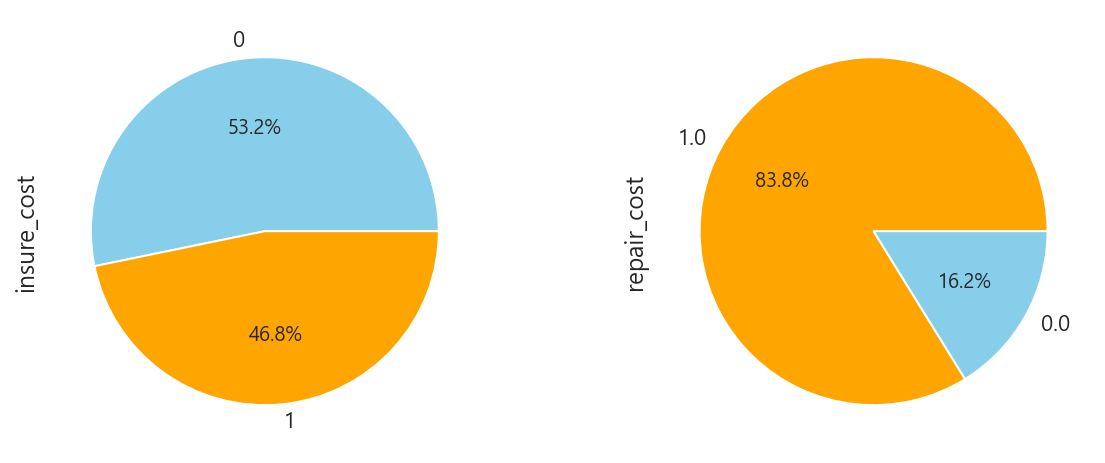

In [56]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
normal_insure['insure_cost'].value_counts().plot.pie(autopct='%1.1f%%', colors=["skyblue", "orange"], ax=ax[0])
normal_insure['repair_cost'].value_counts().plot.pie(autopct='%1.1f%%', colors=["orange", "skyblue"], ax=ax[1])
plt.show()

### <사기꾼 데이터 중(normal) insure_cost, repair_cost가 둘 다 0인값을 제거 => `fraud_insure`>

In [58]:
df2 = fraud[(fraud["insure_cost"] == 0) & (fraud["repair_cost"] == 0)].index
fraud_insure = fraud.drop(df2)
len(fraud_insure)

29

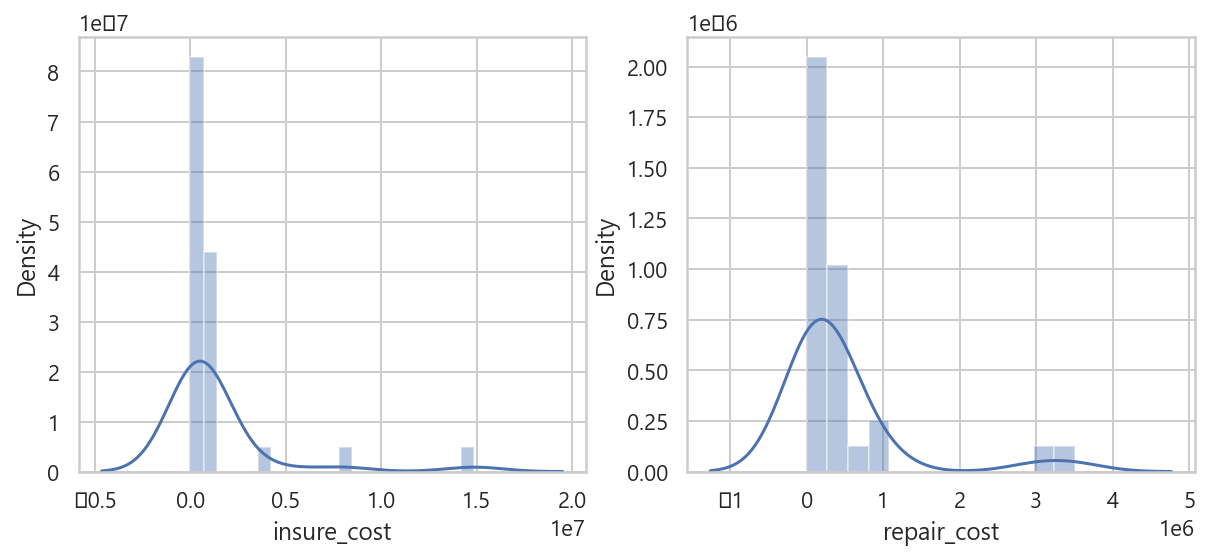

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.distplot(fraud_insure["insure_cost"], ax=ax[0])
sns.distplot(fraud_insure["repair_cost"], ax=ax[1])
plt.show()

In [61]:
for idx, data in fraud_insure.iterrows():
    if data['insure_cost'] == 0:
        fraud_insure.loc[idx, 'insure_cost'] = 0
    else:
        fraud_insure.loc[idx, 'insure_cost'] = 1

fraud_insure['insure_cost'].value_counts()

1    20
0     9
Name: insure_cost, dtype: int64

In [62]:
for idx, data in fraud_insure.iterrows():
    if data['repair_cost'] == 0:
        fraud_insure.loc[idx, 'repair_cost'] = 0
    else:
        fraud_insure.loc[idx, 'repair_cost'] = 1

fraud_insure['repair_cost'].value_counts()

1.0    18
0.0    11
Name: repair_cost, dtype: int64

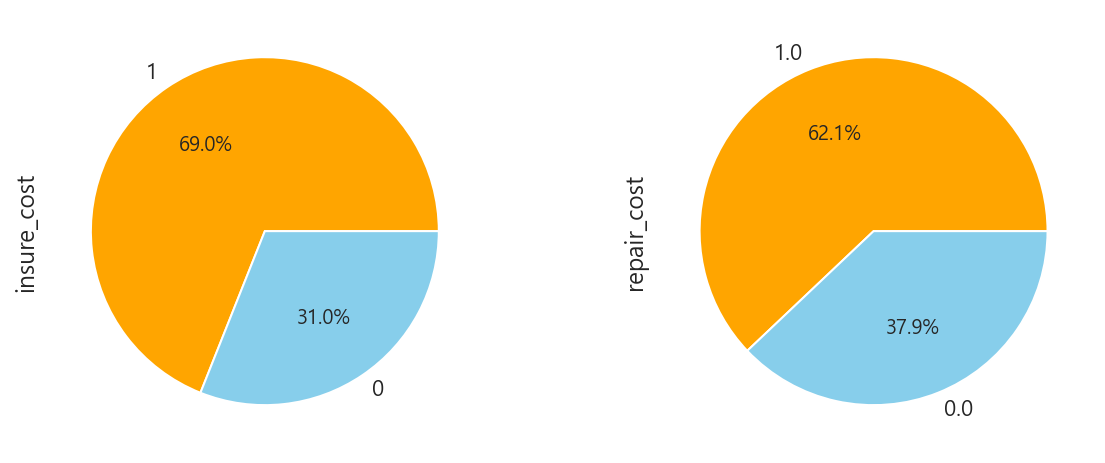

In [65]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
fraud_insure['insure_cost'].value_counts().plot.pie(autopct='%1.1f%%', colors=["orange", "skyblue"], ax=ax[0])
fraud_insure['repair_cost'].value_counts().plot.pie(autopct='%1.1f%%', colors=["orange", "skyblue"], ax=ax[1])
plt.show()

# 즉 ! 

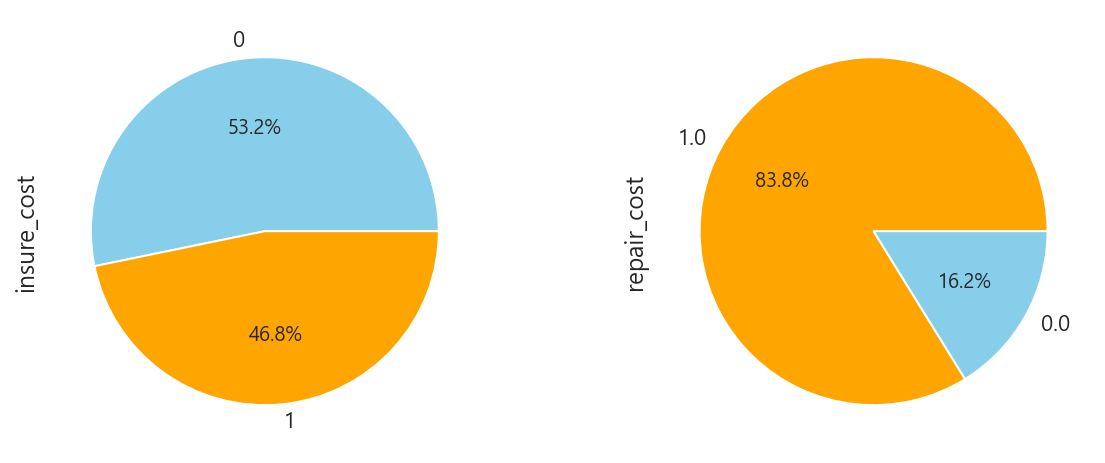

In [66]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
normal_insure['insure_cost'].value_counts().plot.pie(autopct='%1.1f%%', colors=["skyblue", "orange"], ax=ax[0])
normal_insure['repair_cost'].value_counts().plot.pie(autopct='%1.1f%%', colors=["orange", "skyblue"], ax=ax[1])
plt.show()

- 쏘카 일반집단 데이터 중에서 insure cost, repair cost 둘 다 0인 값들은 제외한 데이터 중에서 insure/repair cost를 나타낸 표
## 보험손해비용 발생 46%, 차량수리비용 발생 83.8%

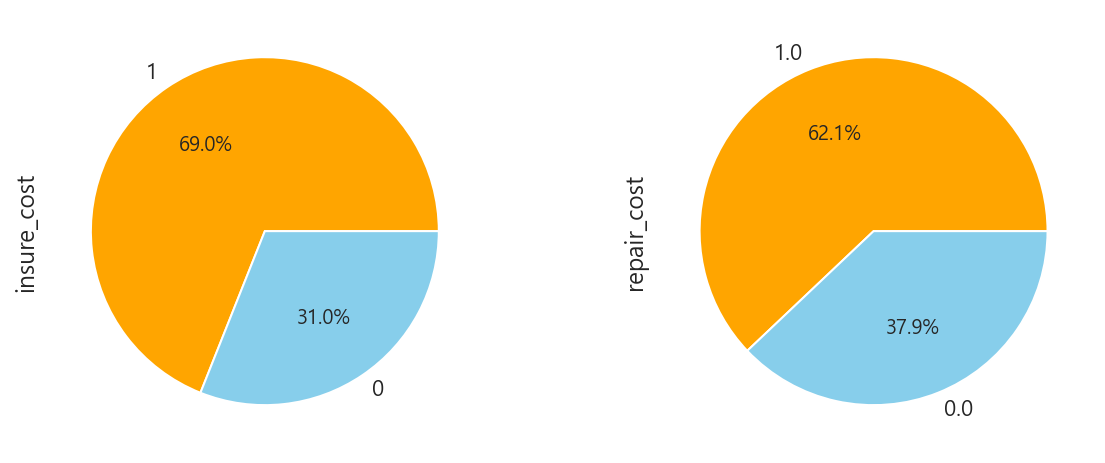

In [67]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
fraud_insure['insure_cost'].value_counts().plot.pie(autopct='%1.1f%%', colors=["orange", "skyblue"], ax=ax[0])
fraud_insure['repair_cost'].value_counts().plot.pie(autopct='%1.1f%%', colors=["orange", "skyblue"], ax=ax[1])
plt.show()

- 쏘카 사기집단 데이터 중에서 insure cost, repair cost 둘 다 0인 값들은 제외한 데이터 중에서 insure/repair cost를 나타낸 표
## 보험손해비용 발생 69%, 차량수리비용 발생 62.1%